In [7]:
import pandas as pd
import numpy as np
import scipy.stats as st

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
print(df.T.describe())

                1992           1993           1994           1995
count    3650.000000    3650.000000    3650.000000    3650.000000
mean    34484.080607   39975.673587   37565.689950   47798.504333
std    150473.176164   88558.520583  120317.078777   54828.074297
min   -528303.381600 -287127.421315 -382709.382654 -138894.685422
25%    -67555.298773  -21665.471992  -45516.912051   11680.007981
50%     31756.198287   41001.778992   39197.241173   49103.396625
75%    135081.379021   99766.920131  121367.183244   84271.976610
max    622629.206119  358327.854561  423792.855746  262363.983464


In [8]:
df['mean']=df.mean(axis=1)
df['std']=df.std(axis=1)

#this is approximate method for interval
df['sem']=df.sem(axis=1)
df['i_min']=df['mean']-df['sem']*4
df['i_max']=df['mean']+df['sem']*4

df['yerr']=df['sem']*4 
print(df[['mean', 'i_min', 'i_max', 'yerr', 'std', 'sem']])

              mean         i_min         i_max         yerr            std  \
1992  34484.080607  24526.128257  44442.032957  9957.952350  150452.561989   
1993  39975.673587  34115.319328  45836.027846  5860.354259   88546.388448   
1994  37565.689950  29603.527572  45527.852328  7962.162378  120300.595857   
1995  47798.504333  44170.401478  51426.607188  3628.102855   54820.563088   

              sem  
1992  2489.488088  
1993  1465.088565  
1994  1990.540595  
1995   907.025714  


<IPython.core.display.Javascript object>


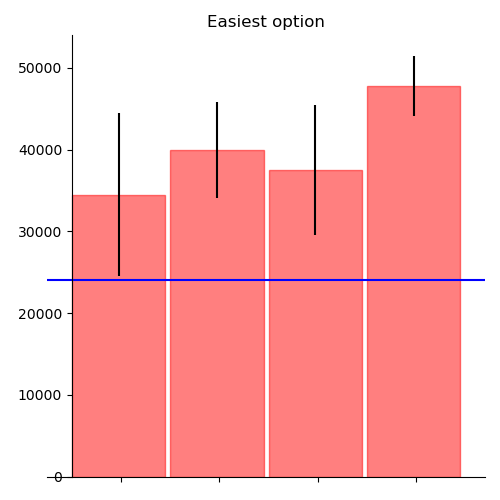

9

In [9]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neitral_color='grey'

class Cursor(object):
    _df=None
    _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(color='b')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['i_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(cl_neitral_color)
        plt.draw()

        
def plot_base(fix_x, fig_y, fig_title, c_alpha=0.5):
    ax=df['mean'].plot.bar(yerr=df['yerr'], 
        title =fig_title, figsize=(fix_x, fig_y), 
        legend=False, fontsize=10, alpha=c_alpha, width=0.95, 
        rot=0, position=0, style='-', color=cl_neitral_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    majors = [0.5,1.5,2.5, 3.5]
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:5])

ax, barlist=plot_base(5, 5, "Easiest option")

cursor = Cursor(ax, df, barlist)
plt.connect('motion_notify_event', cursor.mouse_move)

In [10]:
%matplotlib notebook
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

from collections import OrderedDict


dct=OrderedDict( [('navy','-100%'), ('blue','-80%'), ('steelblue','-60%'), ('lightblue','-40%'), 
                ('lightcyan','-20%'), ('wheat','20%'), ('sandybrown','40%'), 
                ('salmon','60%'), ('red','80%'), ('brown','100%')] )

com_alpha=0.7

<IPython.core.display.Javascript object>


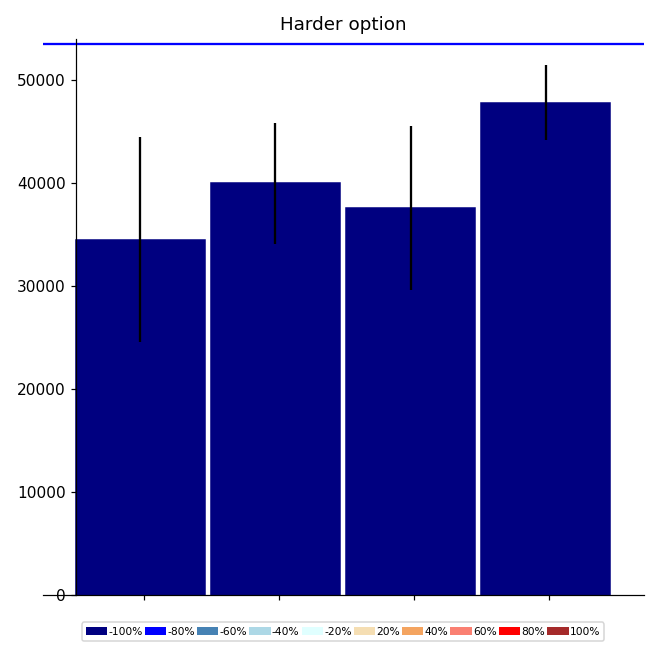

9

In [13]:
class CursorHard(Cursor):
    #_colors=list(dct.keys())
    _colors=list(reversed(dct.keys()))
    _num_bins=8
    def _get_color(self, d_series, val):
        s=d_series[['i_min', 'i_max']]
        s['val']=val
        s=pd.cut(s, bins=self._num_bins, labels=list(range(self._num_bins)), include_lowest=False, right=True)
        return self._colors[s['val']+1]

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[-1])
                continue
            if row['i_min']>y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[0])
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(self._get_color(row, y))
        plt.draw()

ax1, barlist1=plot_base(6, 6, 'Harder option', c_alpha=1) 

bars_leg=[]
for k, v in dct.items():
    p=Rectangle((0, 0), 1, 1, fc=k, label=v)
    bars_leg.append(p)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.2, handletextpad=0.1, fontsize=7)

plt.tight_layout()
plt.show()

hcursor = CursorHard(ax1, df, barlist1)
plt.connect('motion_notify_event', hcursor.mouse_move)